# Modelos de Regresion

Utilizando modelos de regresion, buscamos predecir la satisfaccion del cliente y los retrasos en entregas.

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Abrir CSV
df = pd.read_csv('dataset/cleaned_orders.csv')
df['delivery_delayed'] =  df['delivery_delayed'].astype(int)
df.drop(columns=['has_comment', 'has_title'], inplace=True)
df = df.dropna()

# Separar en test y train con 30/70
dftrain, dftest = train_test_split(
    df,
    test_size=0.3,
    stratify=df['review_score'],
    random_state=42
)

df.head(15)


,estimated_delivery_days,delivery_days,delivery_delta,delivery_delayed,avg_product_price,total_order_price,item_count,order_freight_value,avg_product_weight,total_order_weight_g,avg_product_volume_cm3,total_order_volume_cm3,freight_to_price,shipping_distance_km,different_state,payment_installments,split_payments,review_score,seller_state_AM,seller_state_BA,seller_state_CE,seller_state_DF,seller_state_ES,seller_state_GO,seller_state_MA,seller_state_MG,seller_state_MS,seller_state_MT,seller_state_PA,seller_state_PB,seller_state_PE,seller_state_PI,seller_state_PR,seller_state_RJ,seller_state_RN,seller_state_RO,seller_state_RS,seller_state_SC,seller_state_SE,seller_state_SP,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MA,customer_state_MG,customer_state_MS,customer_state_MT,customer_state_PA,customer_state_PB,customer_state_PE,customer_state_PI,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,15,8,7,0,29.99,29.99,1,8.72,500.0,500.0,1976.0,1976.0,0.290764,18.051106,False,1.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,19,13,6,0,118.70,118.70,1,22.76,400.0,400.0,4693.0,4693.0,0.191744,852.256379,True,1.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,26,9,17,0,159.90,159.90,1,19.22,420.0,420.0,9576.0,9576.0,0.120200,511.820721,True,3.0,1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,26,13,13,0,45.00,45.00,1,27.20,450.0,450.0,6000.0,6000.0,0.604444,1816.652139,True,1.0,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,12,2,10,0,19.90,19.90,1,8.72,250.0,250.0,11475.0,11475.0,0.438191,30.189028,False,1.0,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,22,16,6,0,147.90,147.90,1,27.36,7150.0,7150.0,42250.0,42250.0,0.184990,412.633095,True,6.0,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,21,9,12,0,59.99,59.99,1,15.17,50.0,50.0,4352.0,4352.0,0.252875,322.233743,True,3.0,1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,41,9,32,0,19.90,19.90,1,16.05,300.0,300.0,18375.0,18375.0,0.806533,871.481458,True,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,24,18,6,0,149.99,149.99,1,19.77,9750.0,9750.0,72324.0,72324.0,0.131809,111.702014,False,1.0,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.

## Regresion Lineal

### Prediccion Satisfaccion Cliente

Primero, separamos los modelos entre X e Y con la variable objetivo

In [73]:
x_train = dftrain.drop(columns=['review_score'])
y_train = dftrain['review_score']

x_test = dftest.drop(columns=['review_score'])
y_test = dftest['review_score']

Empezando, vamos a realizar una regresion simple con todas las variables

R² Score: 0.178
MSE: 1.36


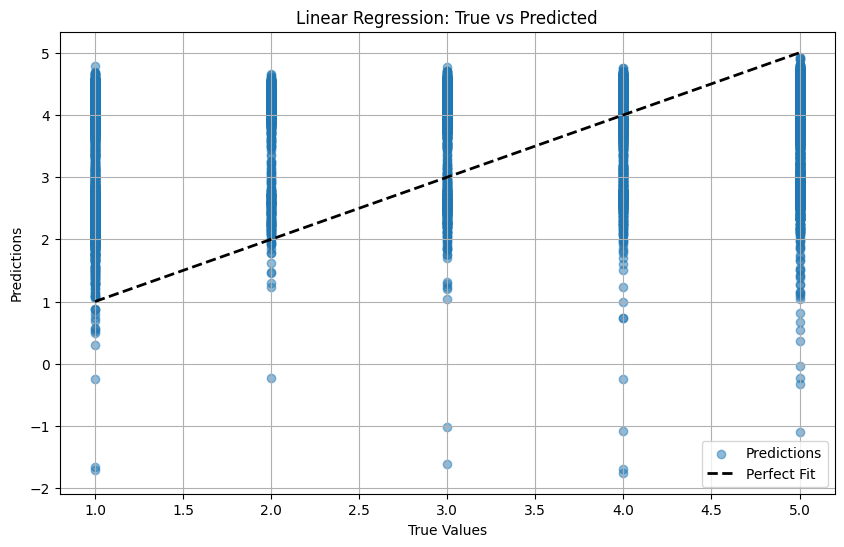

In [74]:
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression: True vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

Dentro del dataset tenemos algunas variables correlacionadas, debido a esto 

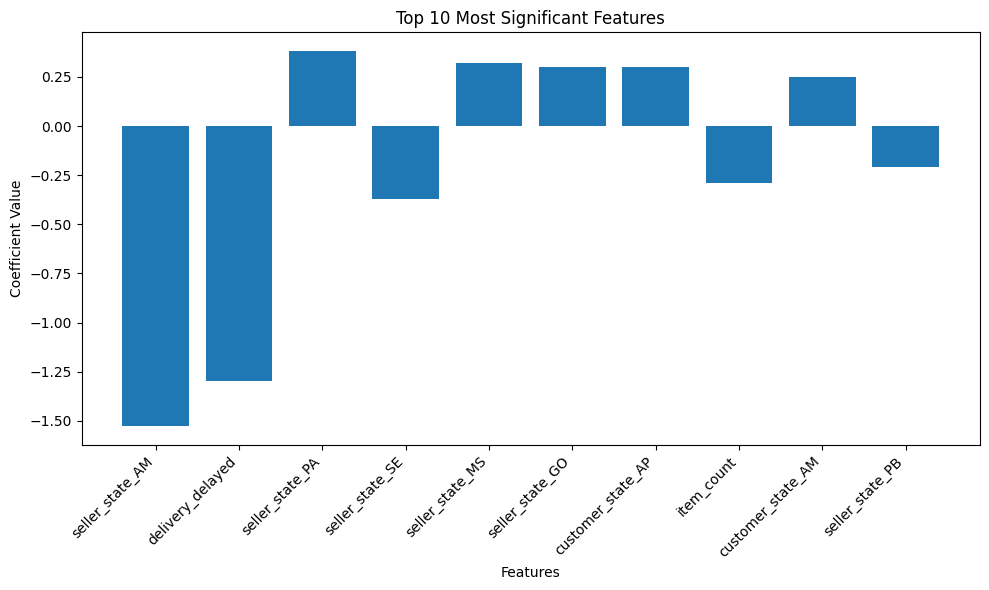

In [75]:
feature_names = list(x_train.columns)

coefficients = model.coef_
feature_coefficient_pairs = list(zip(feature_names, coefficients))
feature_coefficient_pairs = sorted(
    feature_coefficient_pairs, key=lambda x: abs(x[1]), reverse=True
)

top_n = 10
top_features = feature_coefficient_pairs[:top_n]

top_feature_names = [feature[0] for feature in top_features]
top_coefficients = [feature[1] for feature in top_features]

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(top_feature_names, top_coefficients)  # Use top_feature_names directly as x-axis labels
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title(f'Top {top_n} Most Significant Features')
plt.xticks(
    rotation=45, ha='right'
)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
x_train = dftrain.drop(columns=['review_score'])
y_train = dftrain['review_score']

x_test = dftest.drop(columns=['review_score'])
y_train = dftrain['review_score']

rf_regressor = RandomForestRegressor(n_estimators=100, random_state = 42, max_depth = 7)

Evaluación del Modelo Random Forest:
Mean Squared Error (MSE): 1.355067
Mean Absolute Error (MAE): 0.896253
R-squared (R²): 0.177657


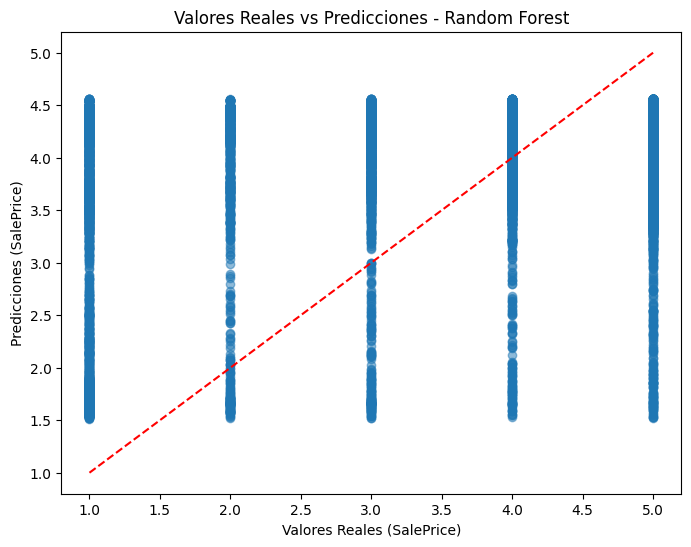

In [78]:
rf_regressor.fit(x_train, y_train)
Y_pred = rf_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del Modelo Random Forest:")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R-squared (R²): {r2:.6f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, Y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Valores Reales (SalePrice)")
plt.ylabel("Predicciones (SalePrice)")
plt.title("Valores Reales vs Predicciones - Random Forest")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],      # Number of trees
    'max_depth': [None, 10, 20],      # Tree depth
    'min_samples_split': [2, 5],      # Minimum samples to split
}

# Initialize GridSearch
rf_regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=rf_regressor,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Optimization metric
    n_jobs=-1,               # Use all CPU cores
    verbose=2                # Print progress
)

# Run grid search
grid_search.fit(x_train, y_train)

# Get best model
best_rf = grid_search.best_estimator_

# Evaluate
y_pred = best_rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nBest Parameters:", grid_search.best_params_)
print("\nEvaluación del Modelo Random Forest Optimizado:")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R-squared (R²): {r2:.6f}")

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         color='red', linestyle='--')
plt.xlabel("Valores Reales (SalePrice)")
plt.ylabel("Predicciones (SalePrice)")
plt.title("Valores Reales vs Predicciones - Random Forest Optimizado")
plt.show()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.5min
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time= 1.5min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.5min
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time= 1.5min
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  33.6s
[CV] END max_depth=10, min_s

## Naive Bayes

## KNN

In [ ]:
# Crear el modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, y_train)

# Predicciones
y_pred_knn = knn_model.predict(X_test)

# Evaluación
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print(f"Resultados KNN Regression:")
print(f"MAE  = {mae_knn:.2f} días")
print(f"RMSE = {rmse_knn:.2f} días")
print(f"R²   = {r2_knn:.4f}")

## SVR

In [ ]:
from sklearn.svm import SVR

# 1. Aplicar muestreo al set de entrenamiento
X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=5000, random_state=42)

# 2. Crear el modelo SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_model.fit(X_train_sample, y_train_sample)

# 3. Predicciones (usamos el test completo para evaluar)
y_pred_svr = svr_model.predict(X_test)

# 4. Evaluación
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Resultados SVR (con muestreo de 5000 registros):")
print(f"MAE  = {mae_svr:.2f} días")
print(f"RMSE = {rmse_svr:.2f} días")
print(f"R²   = {r2_svr:.4f}")